In [12]:
import pickle
import pandas as pd 
import string
from operator import itemgetter


In [13]:
loaded_data= pickle.load(file=open("steam_data2.pkl"))

steam_df = pd.io.json.json_normalize(data=loaded_data)


In [18]:
steam_df.head()

,comments.data,comments.paging.cursors.after,comments.paging.cursors.before,comments.paging.next,created_time,id,likes.data,likes.paging.cursors.after,likes.paging.cursors.before,likes.paging.next,message
0,[{u'created_time': u'2017-04-19T17:56:51+0000'...,MQZDZD,MjYZD,NaN,2017-04-19T17:31:29+0000,67919847338_10154576910077339,"[{u'id': u'839213412766050', u'name': u'Trễ Mộ...",MTQ3MDAxODk2NjYyMzIyNQZDZD,ODM5MjEzNDEyNzY2MDUw,https://graph.facebook.com/v2.8/67919847338_10...,A new batch of classic Activision games are No...
1,[{u'created_time': u'2017-04-19T22:07:30+0000'...,MQZDZD,MTUZD,NaN,2017-04-19T17:02:50+0000,67919847338_10154576850882339,"[{u'id': u'1556384397935944', u'name': u'Surac...",Njc3NTQ3NDUyMjgzODg3,MTU1NjM4NDM5NzkzNTk0NAZDZD,https://graph.facebook.com/v2.8/67919847338_10...,Man O' War: Corsair - Warhammer Naval Battles ...
2,[{u'created_time': u'2017-04-19T17:20:20+0000'...,MQZDZD,NgZDZD,NaN,2017-04-19T17:02:49+0000,67919847338_10154576850872339,"[{u'id': u'823221387735223', u'name': u'Jang P...",MTQwNzU1NjI5NzM3NzQ0,ODIzMjIxMzg3NzM1MjIz,https://graph.facebook.com/v2.8/67919847338_10...,Today's Deal: Save 67% on The Final Station !*...
3,[{u'created_time': u'2017-04-19T16:35:52+0000'...,MQZDZD,NgZDZD,NaN,2017-04-19T16:31:21+0000,67919847338_10154576786712339,"[{u'id': u'823221387735223', u'name': u'Jang P...",MTAxNTIzNjU5Mzk1OTM4OTAZD,ODIzMjIxMzg3NzM1MjIz,https://graph.facebook.com/v2.8/67919847338_10...,Forts is Now Available on Steam and is 10% off...
4,[{u'created_time': u'2017-04-19T17:01:58+0000'...,NAZDZD,MTUZD,NaN,2017-04-18T20:33:52+0000,67919847338_10154574571902339,"[{u'id': u'505872672849914', u'name': u'Edmund...",NDA2MTA2MzQ2NDQ0OTIx,NTA1ODcyNjcyODQ5OTE0,https://graph.facebook.com/v2.8/67919847338_10...,Flinthook is Now Available on Steam and is 10%...


In [20]:
steam_df.drop( steam_df.columns[[1,2,3,8,9]] ,1 , inplace=True )

In [21]:
steam_df.head()

,comments.data,created_time,id,likes.data,likes.paging.cursors.after,message
0,[{u'created_time': u'2017-04-19T17:56:51+0000'...,2017-04-19T17:31:29+0000,67919847338_10154576910077339,"[{u'id': u'839213412766050', u'name': u'Trễ Mộ...",MTQ3MDAxODk2NjYyMzIyNQZDZD,A new batch of classic Activision games are No...
1,[{u'created_time': u'2017-04-19T22:07:30+0000'...,2017-04-19T17:02:50+0000,67919847338_10154576850882339,"[{u'id': u'1556384397935944', u'name': u'Surac...",Njc3NTQ3NDUyMjgzODg3,Man O' War: Corsair - Warhammer Naval Battles ...
2,[{u'created_time': u'2017-04-19T17:20:20+0000'...,2017-04-19T17:02:49+0000,67919847338_10154576850872339,"[{u'id': u'823221387735223', u'name': u'Jang P...",MTQwNzU1NjI5NzM3NzQ0,Today's Deal: Save 67% on The Final Station !*...
3,[{u'created_time': u'2017-04-19T16:35:52+0000'...,2017-04-19T16:31:21+0000,67919847338_10154576786712339,"[{u'id': u'823221387735223', u'name': u'Jang P...",MTAxNTIzNjU5Mzk1OTM4OTAZD,Forts is Now Available on Steam and is 10% off...
4,[{u'created_time': u'2017-04-19T17:01:58+0000'...,2017-04-18T20:33:52+0000,67919847338_10154574571902339,"[{u'id': u'505872672849914', u'name': u'Edmund...",NDA2MTA2MzQ2NDQ0OTIx,Flinthook is Now Available on Steam and is 10%...


In [24]:
type(steam_df.created_time.loc[0])

unicode

In [ ]:
pd.to_datetime

### Group by date

In [25]:
date_df =pd.DataFrame(pd.to_datetime(group_df.created_time))
date_df.head()

,created_time
0,2017-04-19 17:31:29
1,2017-04-19 17:02:50
2,2017-04-19 17:02:49
3,2017-04-19 16:31:21
4,2017-04-18 20:33:52


In [26]:
date_df.created_time.loc[0]

Timestamp('2017-04-19 17:31:29')

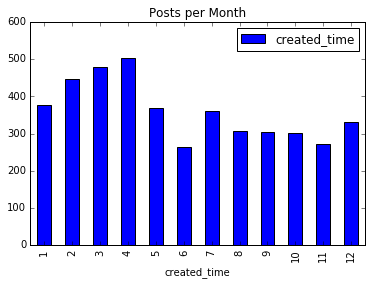

In [42]:
%matplotlib inline
fig=date_df.groupby(date_df.created_time.dt.month).count().plot(kind="bar",title="Posts per Month")
fig

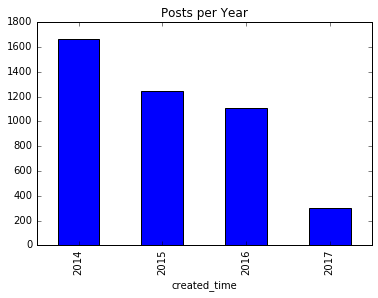

In [43]:
date_df.groupby(date_df.created_time.dt.year).count().plot(kind="bar", legend=False,title="Posts per Year")


In [44]:
date_df[ date_df.created_time > "1-1-2017"]

,created_time
0,2017-04-19 17:31:29
1,2017-04-19 17:02:50
2,2017-04-19 17:02:49
3,2017-04-19 16:31:21
4,2017-04-18 20:33:52
5,2017-04-18 17:17:56
6,2017-04-18 17:17:55
7,2017-04-18 17:17:54
8,2017-04-18 17:17:53
9,2017-04-18 17:01:57


In [ ]:

fig=date_df.groupby(date_df.created_time.dt.day).count().plot(kind="bar", legend=False,title="Posts per Day")


### Top People Commenting

### Flatten Comments 